Dealing with outliers in regression.

In [68]:
#Imports
from random import random
from random import randint
from random import seed

#from math import abs

from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

from matplotlib import pyplot

import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [69]:
#Prepare the data sets
def get_dataset():
    x,y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
    #add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2,4)
        if random() > 0.5:
            x[i] += factor * x.std()
        else:
            x[i] -= factor * x.std()
    return x,y

In [70]:
#Evaluate a model
def evaluate_model(x,y,model):
    #Define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #Evaluate the model
    score = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    #Force score to be positive
    return abs(score)

In [71]:
#Plot the data set and the models line of best fit
def plot_best_fit(x,y,xAxis,model):
    #Fit the model on ALL data
    model.fit(x,y)
    #Plot the data set
    #pyplot.scatter(x,y)

    #Plot line of best fit
    #xAxis = np.arange(x.min(), x.max(), 0.01)
    yAxis = model.predict(xAxis.reshape((len(xAxis),1)))
    pyplot.plot(xAxis, yAxis, label=type(model).__name__)

In [72]:
#Dictionary of model names and model objects
def get_models():
    models = list()
    models.append(LinearRegression())
    models.append(HuberRegressor())
    models.append(RANSACRegressor())
    models.append(TheilSenRegressor())
    return models
    

Model: LinearRegression; Mean MAE: 5.260 (1.149)
Model: HuberRegressor; Mean MAE: 4.435 (1.868)
Model: RANSACRegressor; Mean MAE: 4.525 (2.237)
Model: TheilSenRegressor; Mean MAE: 4.371 (1.961)


<function matplotlib.pyplot.show(close=None, block=None)>

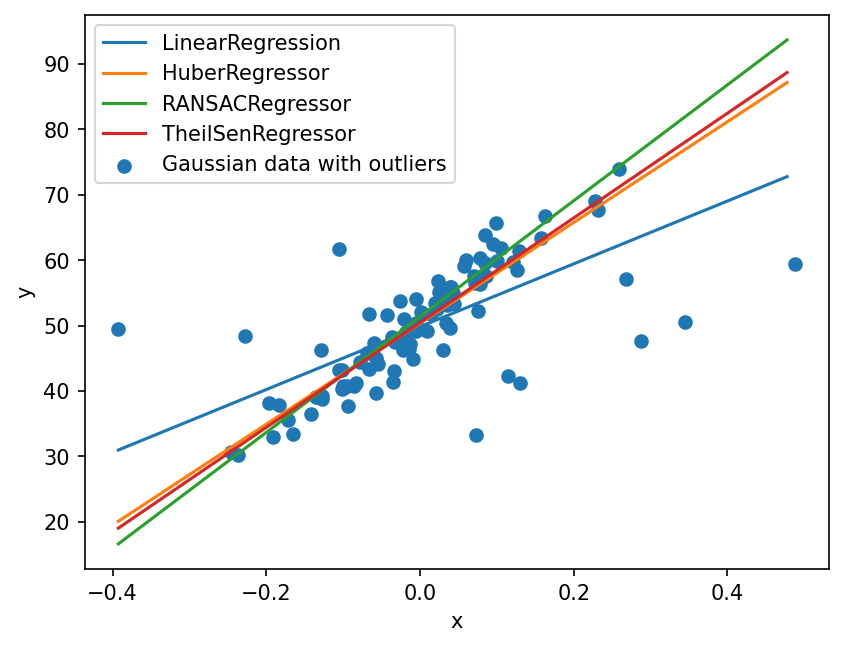

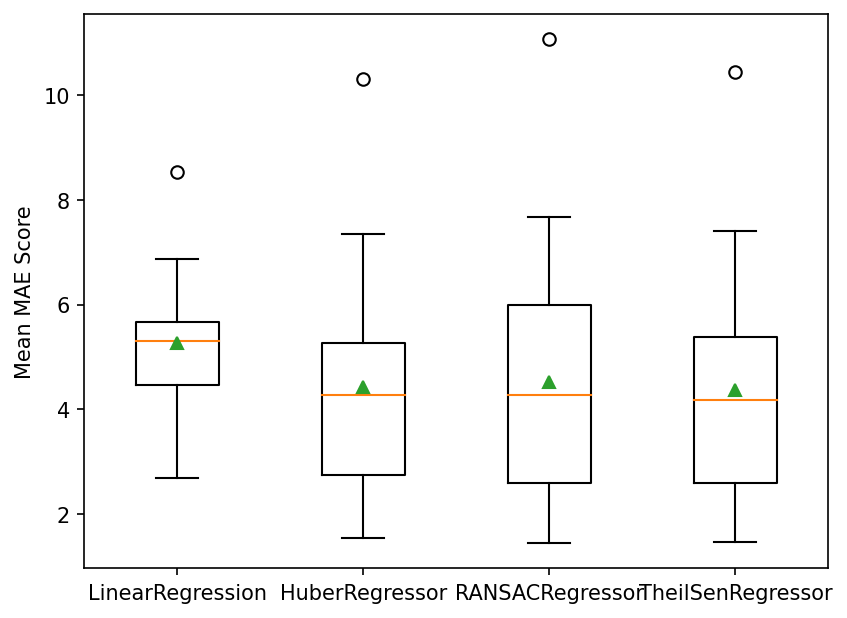

In [77]:
#Generate a  random data set with artificial outliers
x,y = get_dataset()
xAxis = np.arange(x.min(), x.max(), 0.01)

#Define the model
#model = LinearRegression()
#legendNames = list()
results = dict()

pyplot.figure(0)
#Loop through models and evaluate them
for model in get_models():
    #MOdel name
    modelName = type(model).__name__
    #Plot the line of best fit
    plot_best_fit(x,y,xAxis, model)

    #Evaluate the model
    results[modelName] = evaluate_model(x,y,model)
    print('Model: %s; Mean MAE: %.3f (%.3f)' % (modelName, np.mean(results[modelName]), np.std(results[modelName])))
    #legendNames.append(type(model).__name__)
    #plot_best_fit(x,y,model)

#Summarize shape
#print(x.shape, y.shape)

#Plot the data

pyplot.scatter(x,y, label='Gaussian data with outliers')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.legend()

pyplot.show

#Boxplot
pyplot.figure(1)
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.ylabel('Mean MAE Score')
pyplot.show